<h1> 
    Binary Classification - Titanic Spaceship Dataset 
</h1>

<h3> 
    In this file, I explore the passenger list of a fictional space cruise to identify patterns and trends amongst the people who were transported versus those who were not. Then by implementing machine learning techniques I train a model and tune it so that it can identify passengers with an unknown status. <br>
    <br> 
    Below you'll find the following: <br> 
    1. Exploratory Data Analysis <br> 
    2. Data Scrubbing and Cleaning <br> 
    3. ML Selection & Hyperparameter Tuning 
</h3>
​<hr/>​​​​​​​​​​​​​​​​​​​

# 0. Introduction

The dataset can be found at https://www.kaggle.com/competitions/spaceship-titanic 

#### Titanic Data Fields:
__PassengerId__ <br>
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>

__HomePlanet__ <br>
The planet the passenger departed from, typically their planet of permanent residence.<br>

__CryoSleep__ <br>
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>

__Cabin__ <br>
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>

__Destination__ <br>
The planet the passenger will be debarking to.<br>

__Age__ <br>
The age of the passenger.<br>

__VIP__ <br>
Whether the passenger has paid for special VIP service during the voyage.<br>

__RoomService, FoodCourt, ShoppingMall, Spa, VRDeck__ <br>
Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>

__Name__ <br>
The first and last names of the passenger.<br>

__Transported__ <br>
Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

# 1. Investigate the dataset

## 1.1 High-level understanding
This segment is to get a general sense of what kind of information is held

In [22]:
# Import Libraries 
# titanic_data_clean Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Misc
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [23]:
titanic_data = pd.read_csv("/workspaces/ProjectPortfolio/1. Data Science/1. Binary Classification - Titanic_SpaceShip/Titanic_SpaceShip_Data.csv")

By starting off with `.head()` | `.info()` | `.describe()` <br>
I'm trying to understand at a high level, what does the data look like? What are the data types that are being used? What's the distribution of the data across all the fields?

In [24]:
titanic_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [25]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [26]:
titanic_data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


The data fields and types are inline with what I expect based on the description provided for them. <br>
I noticed that there are missing values for all the fields excluding the ID and Target column. <br>
No major outliers identified so far based on mean, standard deviation, and maximum values.



The next segment is to look at the distribution of the target value to see if any class inblance techniques are needed.

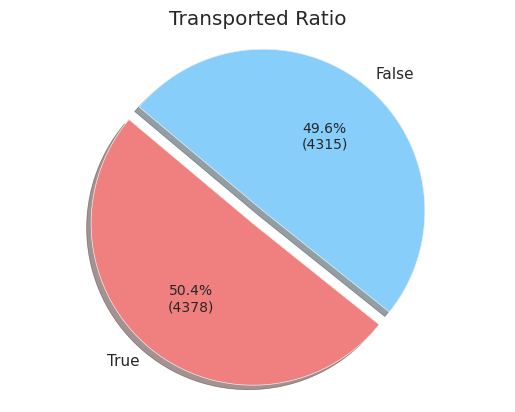

In [27]:
# Look at distribution of target
# Sum treats the True as 1 and False as 0, Count will add everything regardless of T/F
true_count = titanic_data["Transported"].sum()
false_count = titanic_data["Transported"].count() - true_count

# Data to plot
labels = 'True', 'False'
sizes = [true_count, false_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (True) for emphasis

# {:1f}% will return a percentage with 1 decimal point. {:d} returns the full number.
def autopct_format(pct):
    return "{:.1f}%\n({:d})".format(pct, int(round(pct * sum(sizes) / 100)))

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format, shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Give a title to the chart
plt.title("Transported Ratio")

# Display the chart
plt.show()

# This data tells me that there isn't a class imbalance 
# and therefore we do not need to worry about undersampling, SMOTE, or class weight approaches

This data tells me that there isn't a class imbalance and therefore we do not need to worry about undersampling, SMOTE, or class weight approaches

## 1.2 Explore relationship between features and target

This segment is meant to look at the data fields and identify patterns within each column and it's relationship to the target.
I'll need to adjust the data fields so that they fit numerically and can therefore be easily compared to the target.

In [28]:
# New dataset to leave original untouched
df_explore = titanic_data.copy()

In [29]:
# Additional Libraries
from sklearn.preprocessing import OrdinalEncoder

In [30]:
# HomePlanet & Destination are ordinal since there a relationship with distance.

oe = OrdinalEncoder()

home_dest_cols = ['HomePlanet', 'Destination']

for column in home_dest_cols:
    df_explore[column] = oe.fit_transform(df_explore[column].array.reshape(-1, 1))
df_explore.head()    


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,2.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,2.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,2.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,2.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,2.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [31]:
# Extract Cabin to get Deck and Ship Side as features
df_explore[['Deck', 'Cabin_num', 'Side']] = df_explore['Cabin'].str.split('/', expand=True)

df_explore = pd.get_dummies(df_explore, columns=['Deck', 'Side'])
df_explore = df_explore.drop(['Cabin_num'], axis=1)

In [32]:
# Changing the catagorical fields into numerical so that it can all be analyzed
df_explore[['CryoSleep', 'VIP', 'Transported']] = df_explore[['CryoSleep', 'VIP', 'Transported']].astype('float64')
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   float64
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   float64
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   float64
 14  Deck_A        8693 non-null   uint8  
 15  Deck_B        8693 non-null   uint8  
 16  Deck_C        8693 non-null   uint8  
 17  Deck_D        8693 non-null   uint8  
 18  Deck_E        8693 non-null 

We're going to create a list of parameters that we want to tune and identify which are going to provide the best results. <br><br>
What we find when we do a correlation heatmap is that **CryoSleep** does have a noticeable relationship with our target variable at **0.5**. <br> 
The other ones are related to money spent for **room service**, **spa**, and the **VR deck**. <br>
These fields will be important to ensure that we populate the missing fields as accurately as possible.


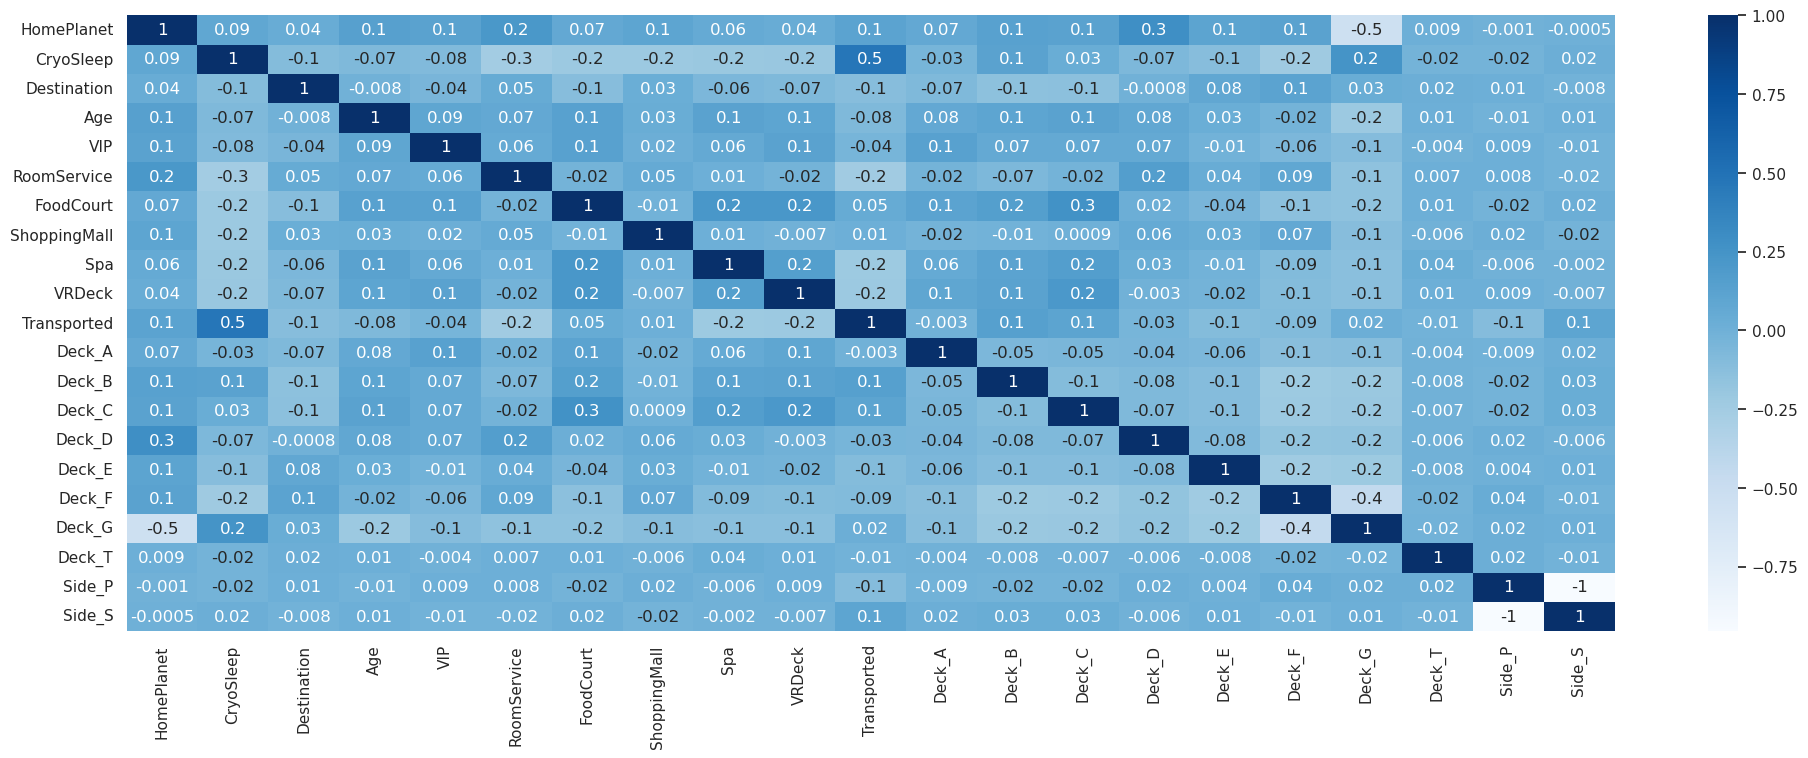

In [33]:
# Heatmap 
plt.figure(figsize=(24, 8))
sns.set_theme(style="white")
corr = df_explore.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

When it comes to the Pair Plot, there is some interesting finds with how the data points are distributed between eachother and themsevles.

For Example:
1. Home Planet does show certain planets will have a higher distribution of the target variable being 1 or 0.
2. Cryo Sleep has a clear pattern as to whether an individual is transported or not.
3. There is an age minimum to be a VIP. Can use to populate missing fields.
4. There is an age minimum to spend money at any of the services.
5. Someone in Cryo Sleep can't spend money. Can be used to populate missing fields



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


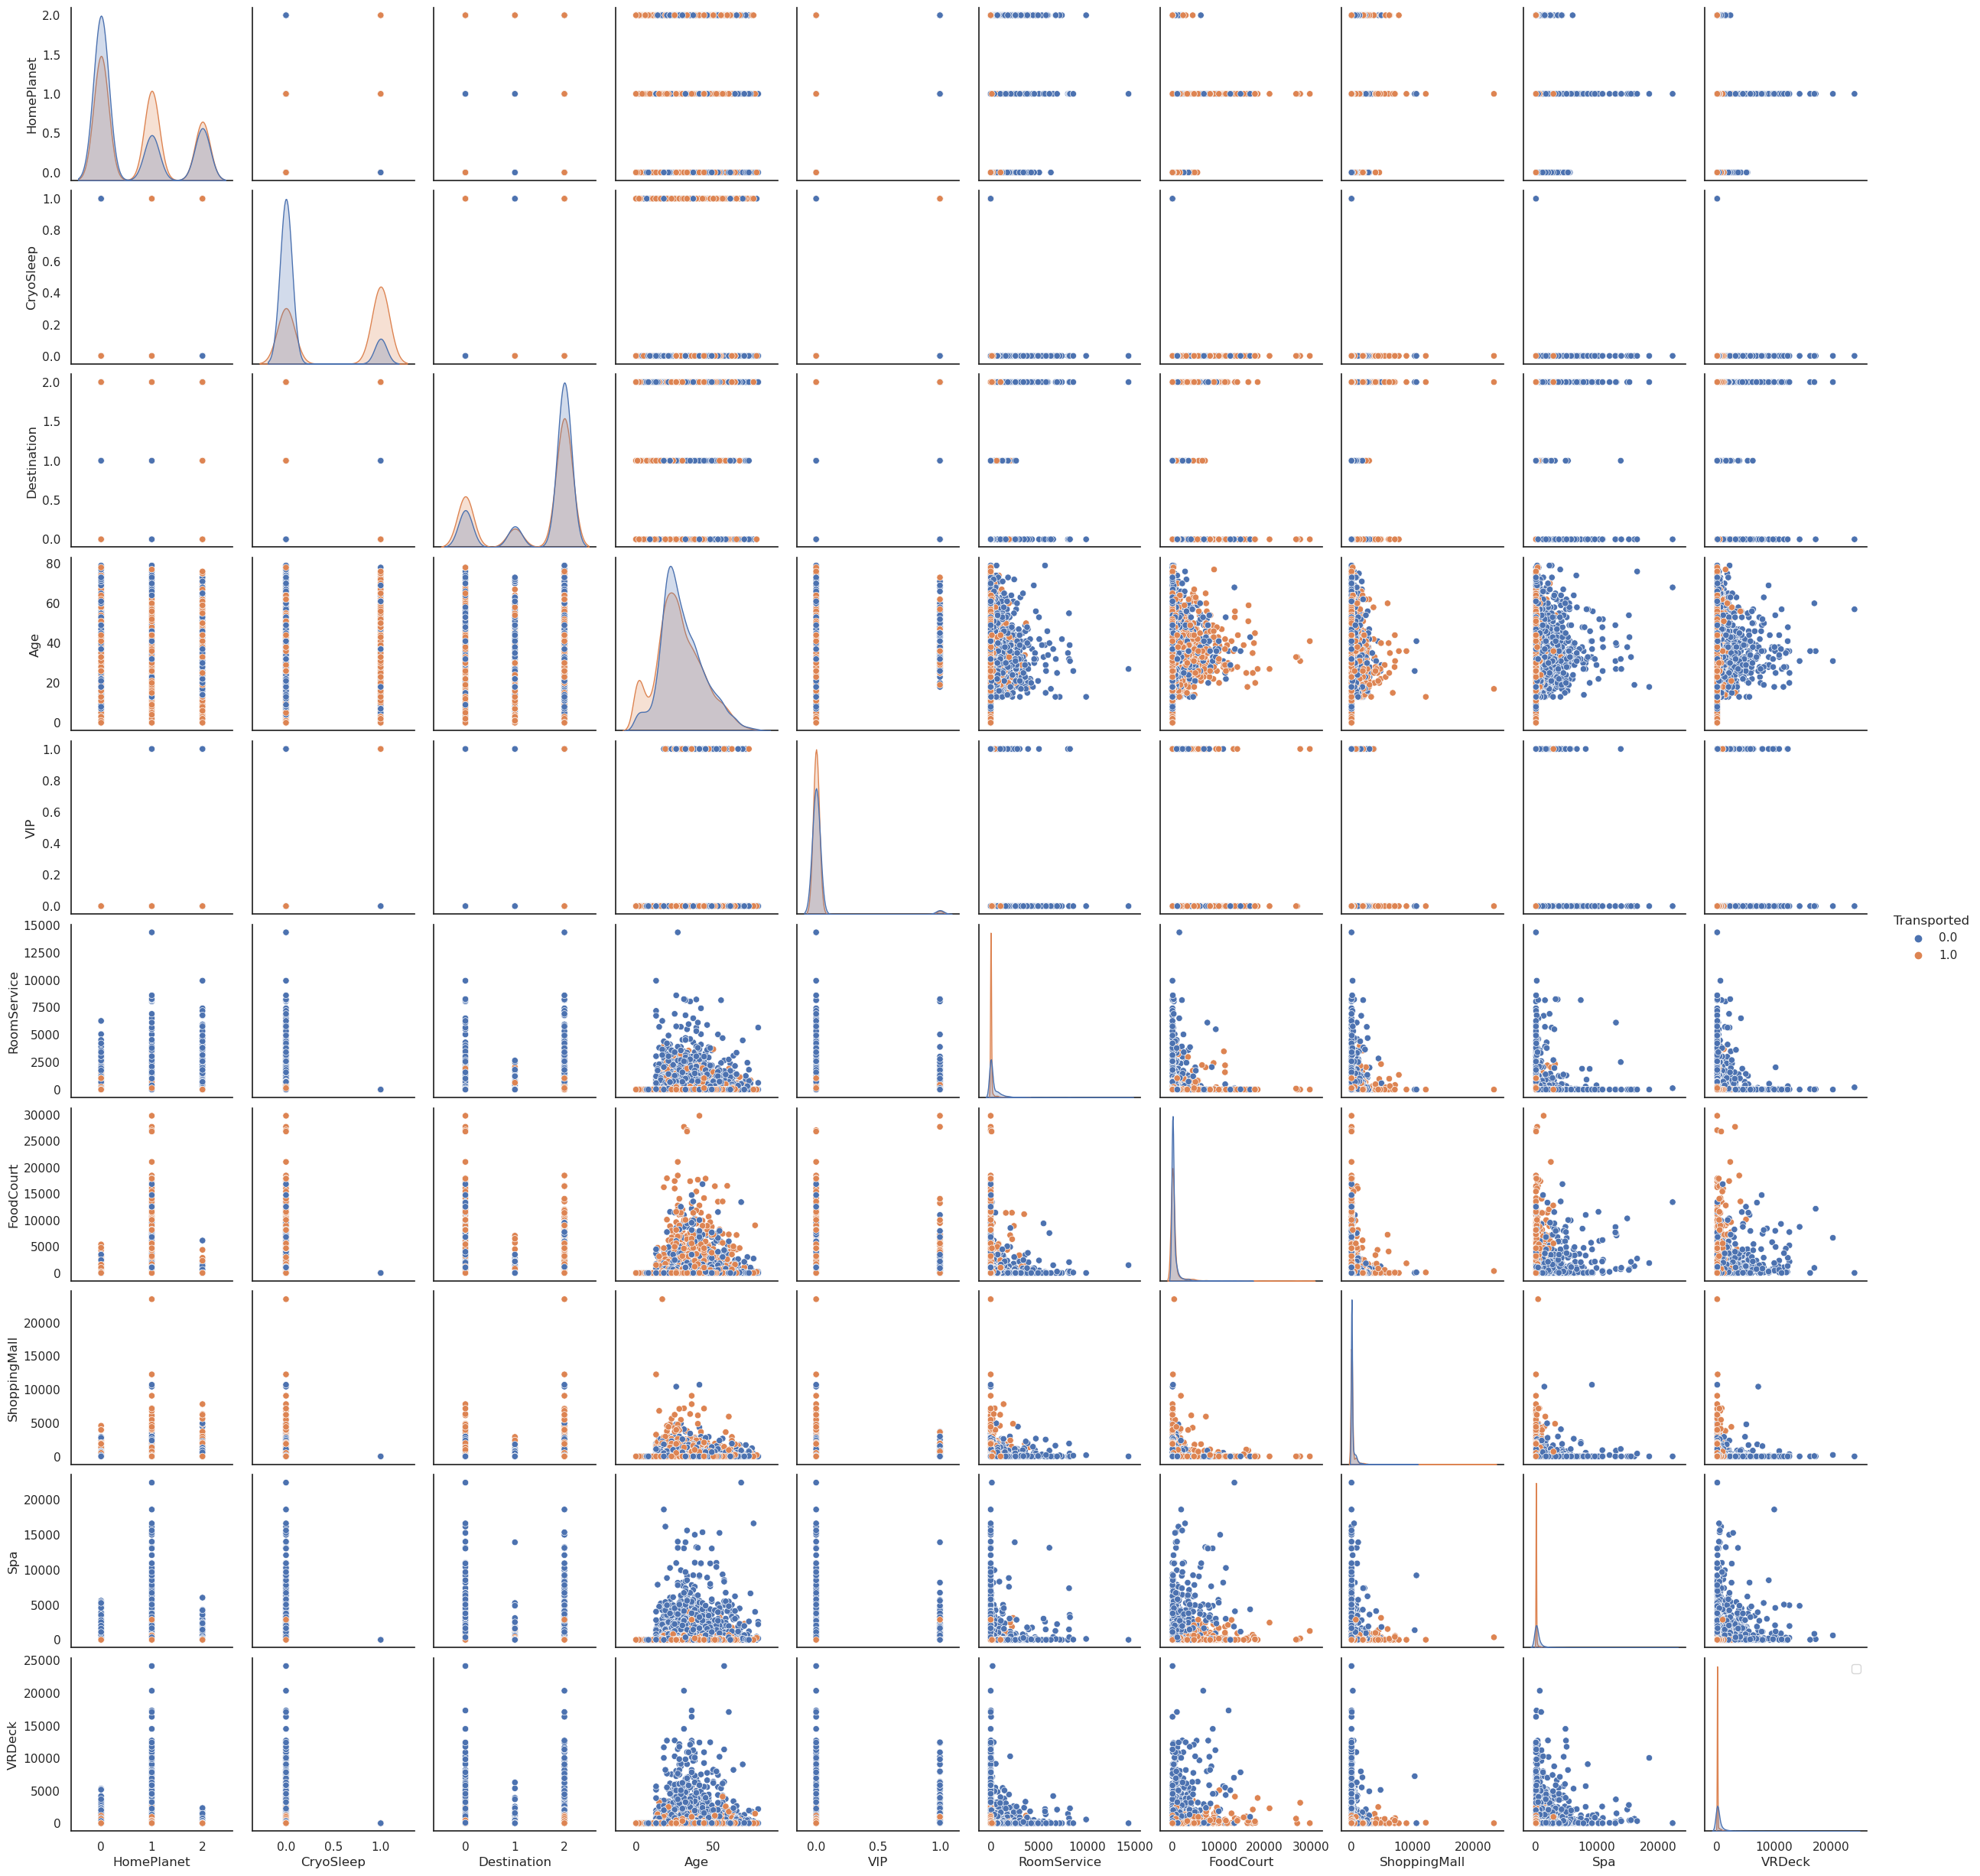

In [34]:
#Pair Plot
columns_to_explore = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
subset_df = df_explore[columns_to_explore]
sns.pairplot(subset_df, hue='Transported')
plt.legend()
plt.show()

Lets test some of the findings above to be sure that they are true.

In [14]:
# This proves my first obeservation with the relation to CryoSleep & Expenses
df_explore[['CryoSleep', 'RoomService', 'FoodCourt',
                          'Spa', 'ShoppingMall', 'VRDeck']].groupby('CryoSleep').sum()

,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
CryoSleep,,,,,
0.0,1865582.0,3799600.0,2588931.0,1443579.0,2530810.0
1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# The youngest VIP is 18 Year Old
df_explore[['VIP', 'Age']].groupby('VIP').min()

,Age
VIP,
0.0,0.0
1.0,18.0


In [16]:
# The youngest to spend any money is 13 Years Old
df_explore[['RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck', 'Age']]\
    .groupby('Age')\
    .sum()\
    .head(20)

,RoomService,FoodCourt,Spa,ShoppingMall,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0


# 2. Data Scrubbing & Cleaning

Now that I've gotten a better understanding of the dataset I'm working with. I'm going to start looking at how I want to clean and populate the information.

In [17]:
# Create new copy of dataset
df_clean = titanic_data.copy()

Since we've identified that there is a relationship between CryoSleep and the expense columns. <br> 
I will use this information to populate missing values between them.

1. Sum the expenses into 1 column
2. if Cryosleep is null and the expense column is summed up to be 0 then the person likely is in cryosleep.
3. The reverse is true, if an expense column is null and CryoSleep is true then the person can't spend any money.
4. If CryoSleep is false then take the average money spent for that service and impute it into the field.

In [18]:
# Populating CryoSleep and Expenses
expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df_clean['Expenses'] = df_clean[expense_columns].sum(axis=1)

df_clean['CryoSleep'] = df_clean.apply(lambda row: True if pd.isna(row['CryoSleep']) and row['Expenses'] == 0 else False, axis=1).astype('float64')

for column in expense_columns:
    df_clean[column] = df_clean.apply(lambda row: 0 if pd.isna(row[column]) and row['CryoSleep'] == True else row[column], axis=1).astype('float64')
    df_clean[column] = df_clean.apply(lambda row: df_clean[column].mean() if pd.isna(row[column]) else row[column], axis=1).astype('float64')

df_clean.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Expenses          0
dtype: int64

Between VIP and Age we know that if someone is a VIP then they can't be younger than 18 which will influence the average age. <br> 
I will use this information to populate missing values between them.

1. Bring in a simple imputer with most_frequent set
2. If VIP is empty and the age is less than 18 then put VIP as False
3. Impute the rest of VIP as the most frequent since we don't have a way to identify if a person over 18 is a VIP or not
4. Populate Age based on the average age of individuals that are a VIP or not.

In [19]:
# Populating VIP and Age
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')

df_clean['VIP'] = df_clean.apply(lambda row: False if pd.isna(row['VIP']) and row['Age'] < 18 else row['VIP'], axis=1).astype('float64')
df_clean['VIP'] = si.fit_transform(df_clean['VIP'].array.reshape(-1,1))

VIP_true = df_clean[df_clean['VIP'] == True].Age.mean()
VIP_false = df_clean[df_clean['VIP'] == False].Age.mean()

df_clean['Age'] = df_clean.apply(lambda row: VIP_true if pd.isna(row['Age']) and row['VIP'] == True else row['Age'], axis=1).astype('float64')
df_clean['Age'] = df_clean.apply(lambda row: VIP_false if pd.isna(row['Age']) and row['VIP'] == False else row['Age'], axis=1).astype('float64')  


df_clean.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Expenses          0
dtype: int64

Since we used Ordinal before, we are just adding in a simple imputer that will use most frequent to populate the rest of the missing planets.

In [20]:
# Populate HomePlanet and Destination
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

si = SimpleImputer(strategy='most_frequent')
oe = OrdinalEncoder()

home_dest_cols = ['HomePlanet', 'Destination']

for column in home_dest_cols:
    imputed_data = si.fit_transform(df_clean[column].array.reshape(-1, 1))
    df_clean[column] = imputed_data.ravel()  
    df_clean[column] = oe.fit_transform(df_clean[column].array.reshape(-1, 1))

df_clean.isna().sum()    

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Expenses          0
dtype: int64

In [21]:
# OneHotEncode Deck and Ship Side
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

si = SimpleImputer(strategy='most_frequent')

imputed_data = si.fit_transform(df_clean['Cabin'].array.reshape(-1, 1))
df_clean['Cabin'] = imputed_data.ravel() 
df_clean[['Deck', 'Cabin_num', 'Side']] = df_clean['Cabin'].str.split('/', expand=True)

categorical_columns = ['Deck', 'Side']

encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
encoder.fit(df_clean[categorical_columns])

df_encoded_columns = encoder.transform(df_clean[categorical_columns])

df_encoded = pd.DataFrame(df_encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

df_clean = pd.concat([df_clean.drop(categorical_columns, axis=1).reset_index(drop=True), df_encoded], axis='columns')

df_clean.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Expenses          0
Cabin_num         0
Deck_A            0
Deck_B            0
Deck_C            0
Deck_D            0
Deck_E            0
Deck_F            0
Deck_G            0
Deck_T            0
Side_S            0
dtype: int64

For the last part, I'll be dropping the rest of these columns that will not be part of the feature set.

In [22]:
# Drop unneeded columns
df_clean = df_clean.drop(['PassengerId','Cabin','Cabin_num','Name','Expenses'], axis=1)
df_clean.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_S          0
dtype: int64

In [23]:
# Double check the Data Types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck_A        8693 non-null   float64
 12  Deck_B        8693 non-null   float64
 13  Deck_C        8693 non-null   float64
 14  Deck_D        8693 non-null   float64
 15  Deck_E        8693 non-null   float64
 16  Deck_F        8693 non-null   float64
 17  Deck_G        8693 non-null   float64
 18  Deck_T        8693 non-null 

# 3. Machine Learning Selection & HyperParamter Tuning 

## 3.1 Machine Learning Selection

In this section I'll be taking all that I've learnt from above and now identify a Machine Learning Model that will best suit the problem.

In [24]:
# Import neccesary libraries
# Data Manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [25]:
# New Dataset copied over
df = titanic_data.copy()

In [26]:
# Take all Data Cleaning techniques and convert to a function

def CryoExpenseImputer(df):
    expense_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['Expenses'] = df[expense_columns].sum(axis=1)
    df['CryoSleep'] = df.apply(lambda row: True if pd.isna(row['CryoSleep']) and row['Expenses'] == 0 else False, axis=1).astype('float64')
    for column in expense_columns:
        df[column] = df.apply(lambda row: 0 if pd.isna(row[column]) and row['CryoSleep'] == True else row[column], axis=1).astype('float64')
        df[column] = df.apply(lambda row: df[column].mean() if pd.isna(row[column]) else row[column], axis=1).astype('float64')
    return df

def VIPAgeImputer(df):
    from sklearn.impute import SimpleImputer
    si = SimpleImputer(strategy='most_frequent')
    df['VIP'] = df.apply(lambda row: False if pd.isna(row['VIP']) and row['Age'] < 18 else row['VIP'], axis=1).astype('float64')
    df['VIP'] = si.fit_transform(df['VIP'].array.reshape(-1,1))
    
    VIP_true = df[df['VIP'] == True].Age.mean()
    VIP_false = df[df['VIP'] == False].Age.mean()

    df['Age'] = df.apply(lambda row: VIP_true if pd.isna(row['Age']) and row['VIP'] == True else row['Age'], axis=1).astype('float64')
    df['Age'] = df.apply(lambda row: VIP_false if pd.isna(row['Age']) and row['VIP'] == False else row['Age'], axis=1).astype('float64')  
    return df

def HomeDestImputer(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OrdinalEncoder

    si = SimpleImputer(strategy='most_frequent')
    oe = OrdinalEncoder()

    home_dest_cols = ['HomePlanet', 'Destination']

    for column in home_dest_cols:
        imputed_data = si.fit_transform(df[column].array.reshape(-1, 1))
        df[column] = imputed_data.ravel()  
        df[column] = oe.fit_transform(df[column].array.reshape(-1, 1))

    return df  

def CatagoryTransform(df):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder

    si = SimpleImputer(strategy='most_frequent')

    imputed_data = si.fit_transform(df['Cabin'].array.reshape(-1, 1))
    df['Cabin'] = imputed_data.ravel() 
    df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

    categorical_columns = ['Deck', 'Side']

    encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)
    encoder.fit(df[categorical_columns])

    df_encoded_columns = encoder.transform(df[categorical_columns])

    df_encoded = pd.DataFrame(df_encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

    df = pd.concat([df.drop(categorical_columns, axis=1).reset_index(drop=True), df_encoded], axis='columns')

    return df

def DropColumns(df):
    df = df.drop(['PassengerId','Cabin','Name','Cabin_num'], axis=1)
    return df

#### 1. Logistic Regression:<br>
When to consider: <br>
    The problem is relatively simple and doesn't involve highly intricate interactions among features.<br>
Interpretability is crucial, as stakeholders need to understand and trust the model's decisions.<br>

Pros: <br>
- Simple and interpretable.
- Can handle both linear and non-linear relationships.
- Provides probabilistic outputs that can be useful for risk assessment.
- Efficient to train and suitable for large datasets.<br>

Cons: <br>
- May not capture complex relationships as well as other models.
- Prone to underperform when the features aren't linearly separable.

#### 2. Random Forests:<br>
When to consider: <br>
You need improved predictive performance compared to a single decision tree.<br>
Interpretability is less critical, but understanding feature importance is still valuable.<br>

Pros: <br>
- Reduces overfitting compared to individual decision trees.
- Handles a large number of features well.
- Robust to outliers and noisy data.
- Provides feature importance scores.<br>

Cons: <br>
- Less interpretable than individual decision trees.
- May require more computational resources than simpler models.


#### 3. XGBoost:<br>
When to consider: <br>
You prioritize predictive accuracy and are willing to invest time in hyperparameter tuning.<br>
The dataset is relatively large, and you want to take advantage of parallel processing capabilities.<br>
You need to capture complex interactions among features and handle missing data effectively.<br>
Interpretability is important, but not at the same level as models like logistic regression.<br>

Pros: <br>
- Exceptional predictive performance, often outperforming other models.
- Handles missing values well.
- Can capture complex relationships, both linear and non-linear.
- Regularization techniques help prevent overfitting.
- Provides feature importance scores.
- Parallelizable, making it efficient for large datasets.<br>

Cons: <br>
- Can require more tuning to optimize hyperparameters effectively.
- Interpretability is lower compared to simpler models like logistic regression or decision trees.
- Requires domain knowledge to set appropriate hyperparameters and tune the model.

In [27]:
# All models being evaulated with basic parameter grid
classifiers = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(solver='lbfgs', max_iter=10000),
        'params': {
            'C': [0.1, 1.0, 10.0]
        }
    },
    {
        'name': 'Random Forest',
        'classifier': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20]
        }
    },
    {
        'name': 'XGBoost',
        'classifier': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    }
]

In [28]:
# Load & preprocess dataset
X = titanic_data.drop(['Transported'], axis=1)
y = titanic_data['Transported']

function_list = [CryoExpenseImputer,VIPAgeImputer,HomeDestImputer,CatagoryTransform,DropColumns]    

for function in function_list:
    X  = function(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

We've identified that XGBoost provides the best model accuracy given some basic parameters that were set.

In [29]:
# Identifies the best model out of the 3 selected
best_model = None
best_accuracy = 0.0

for classifier_info in classifiers:
    classifier = classifier_info['classifier']
    params = classifier_info['params']

    grid_search = GridSearchCV(classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_model_name = classifier_info['name']
        best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

training_accuracy = best_accuracy * 100
test_accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

## 3.2 Evalulate Current Binary Classification Metrics

Now that we've identified our Machine Learning Model, the next section is to establish a baseline so that when we tune using HyperParameters we can evaluate the changes we've made.

1. Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 80.91%


2. F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")

Precision: 80.63%
Recall: 81.74%
F1-Score: 81.18%


3. Confusion Matrix

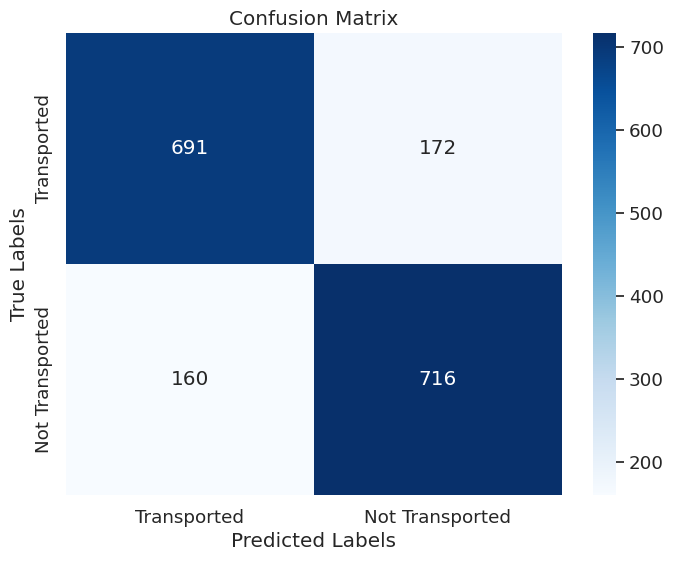

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["Transported", "Not Transported"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

4. ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")


ROC-AUC: 0.8090
Precision-Recall AUC: 0.7510


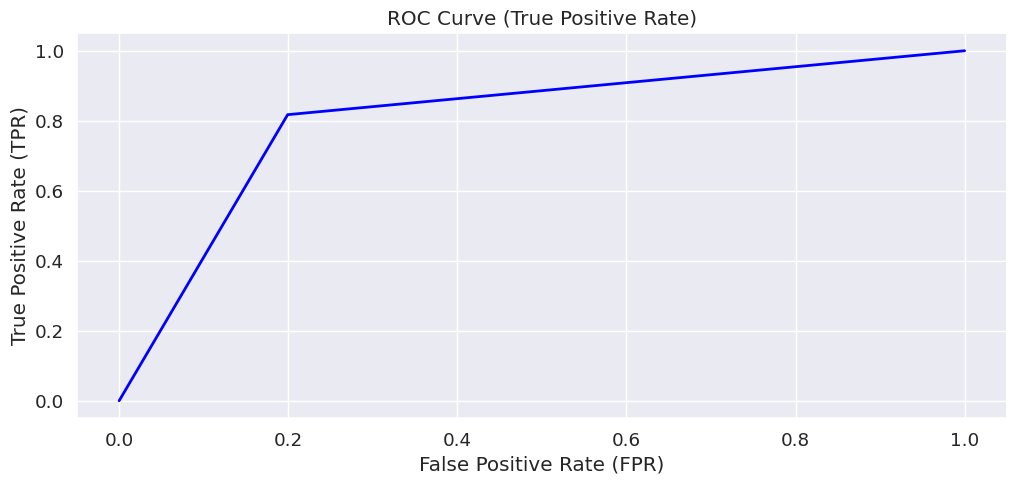

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(12, 5))

plt.plot(fpr, tpr, color='blue', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (True Positive Rate)')
 
plt.show()


# 3.3 HyperParameter Tuning

In [ ]:
# Import neccesary Libraries
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

We're going to create a list of parameters that we want to tune and identify which are going to provide the best results.

In [ ]:
# Define the parameter grid for the grid search

param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [4],
    'min_child_weight': [1],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
}
"""
Original:

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
"""

"\nOriginal:\n\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'max_depth': [3, 4, 5],\n    'min_child_weight': [1, 2, 3],\n    'subsample': [0.8, 0.9, 1.0],\n    'colsample_bytree': [0.8, 0.9, 1.0],\n}\n"

This will be a 5-Fold grid search where we will identify the best results based on the accuracy

In [ ]:
xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)

### When we compare the original results to the new ones, we find that there is a general increase across all stats. <br> The overall accuracy improved by 0.23%, Recall increased by 0.57% with even a slight increase to precision.

#### - New Accuracy:  81.14% | Original Accuracy:  80.91% <br> - New Precision: 80.65% | Original Precision: 80.63% <br> - New Recall: 82.31% | Original Recall: 81.74% <br> - New F1-Score:  81.47% | Original F1-Score:  81.18% <br> - New ROC-AUC:   0.8113 | Original ROC-AUC:   0.8090 <br>- New Precision-Recall AUC: 0.7529 | Original Precision-Recall AUC: 0.7510

In [ ]:
# New Scores
Newaccuracy = accuracy_score(y_test, y_pred) * 100
Newprecision = precision_score(y_test, y_pred) * 100
Newrecall = recall_score(y_test, y_pred) * 100
Newf1 = f1_score(y_test, y_pred) * 100
Newroc_auc = roc_auc_score(y_test, y_pred)
Newpr_auc = average_precision_score(y_test, y_pred)

print("New Best Parameters:", best_params)
print(f"New Accuracy: {Newaccuracy:.2f}% | Original Accuracy: {accuracy:.2f}%")
print(f"New Precision: {Newprecision:.2f}% | Original Precision: {precision:.2f}%")
print(f"New Recall: {Newrecall:.2f}% | Original Recall: {recall:.2f}%")
print(f"New F1-Score: {Newf1:.2f}% | Original F1-Score: {f1:.2f}%")
print(f"New ROC-AUC: {Newroc_auc:.4f} | Original ROC-AUC: {roc_auc:.4f}")
print(f"New Precision-Recall AUC: {Newpr_auc:.4f} | Original Precision-Recall AUC: {pr_auc:.4f}")

New Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
New Accuracy: 81.14% | Original Accuracy: 80.91%
New Precision: 80.65% | Original Precision: 80.63%
New Recall: 82.31% | Original Recall: 81.74%
New F1-Score: 81.47% | Original F1-Score: 81.18%
New ROC-AUC: 0.8113 | Original ROC-AUC: 0.8090
New Precision-Recall AUC: 0.7529 | Original Precision-Recall AUC: 0.7510


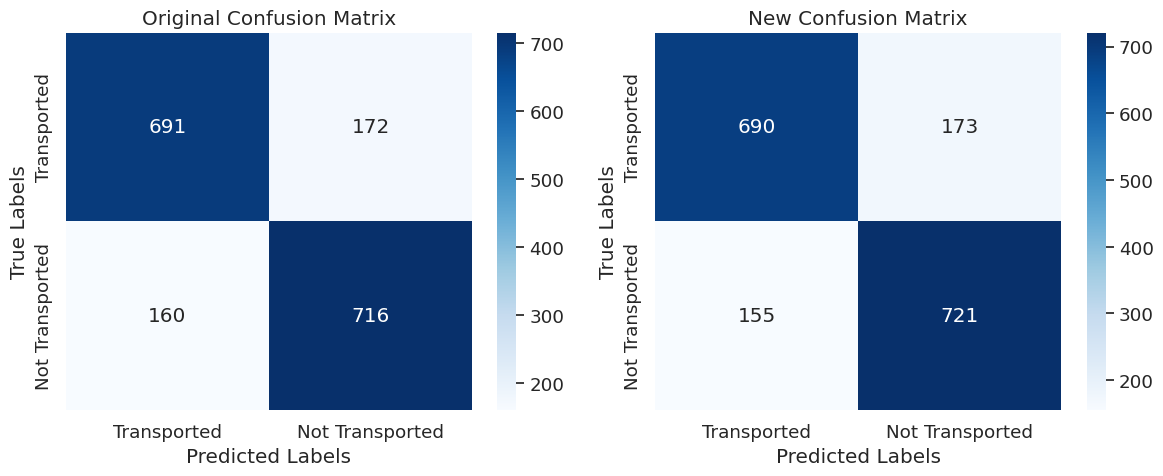

In [ ]:
#Compare Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

new_conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (if not defined elsewhere)
class_labels = ["Transported", "Not Transported"]

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Original Confusion Matrix')

# Plot the new confusion matrix
sns.set(font_scale=1.2)
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('New Confusion Matrix')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# This concludes my study in the Titanic Spaceship Dataset. 
## To recap: 
### 1. I took the dataset and studied the information to best understand how the data is put together. I used different visuals such as a Heatmap and Pair Plot to piece together important relationships between the features and the target variable. 
### 2. I cleaned the data and identified what transformations needed to be made to best fill in any nulls and format the data to input into a machine learning model. 
### 3. I took 3 well regarded models and tested each one to evaluate which one had the best potential to provide accurate results. After scoring the initial results, I tuned the Hyperparameters that lead to an overall increase in the score compared to the original.